# Phase 1: Data Understanding & Exploratory Data Analysis (EDA)

## Project: Predictive Analytics for Customer Churn
**Author:** Mohammed Ishfaq Mostain 
**Date:** 23-12-25

### 1. Introduction
In this phase of the Capstone Project, we will perform a comprehensive analysis of the Telco Customer Churn dataset. Our objectives are to:
1. Load and inspect the data structure.
2. Clean data type issues (specifically `TotalCharges`).
3. Analyze the distribution of the target variable (`Churn`).
4. Perform Univariate and Bivariate analysis to identify key patterns.
5. Assess correlations between features.

This analysis lays the foundation for the Feature Engineering and Modeling phases.

## Setup

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))


# Configure visualization settings
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None) # Display all columns
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

%matplotlib inline

### 1. Data Loading and Inspection
We will load the dataset and display the first few rows to understand the schema.

In [7]:
from src.config import RAW_DATA_DIR
import pandas as pd

file_path = RAW_DATA_DIR / "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)



# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset dimensions
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Shape: 7043 rows, 21 columns


### 2. Statistical Summaries and Data Type Analysis
We inspect the data types to ensure they match the nature of the data. 

**Note:** The `TotalCharges` column is often read as an object (string) because it may contain empty spaces for new customers (tenure=0). We must convert this to numeric.

In [9]:
# Inspect data types
print("Initial Data Info:")
df.info()

# Convert 'TotalCharges' to numeric, coercing errors to NaN (handling blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert 'SeniorCitizen' to categorical for better visualization (0=No, 1=Yes)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Statistical summary for numerical variables
print("\nStatistical Summary (Numerical):")
display(df.describe())

# Statistical summary for categorical variables
print("\nStatistical Summary (Categorical):")
display(df.describe(include=['O']))

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000



Statistical Summary (Categorical):


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### 3. Missing Value Analysis
After converting data types, we check for null values. Since `TotalCharges` became NaN for blank strings, we need to handle them (typically by filling with 0 for zero tenure).

Missing Values per Column:
TotalCharges    11
dtype: int64


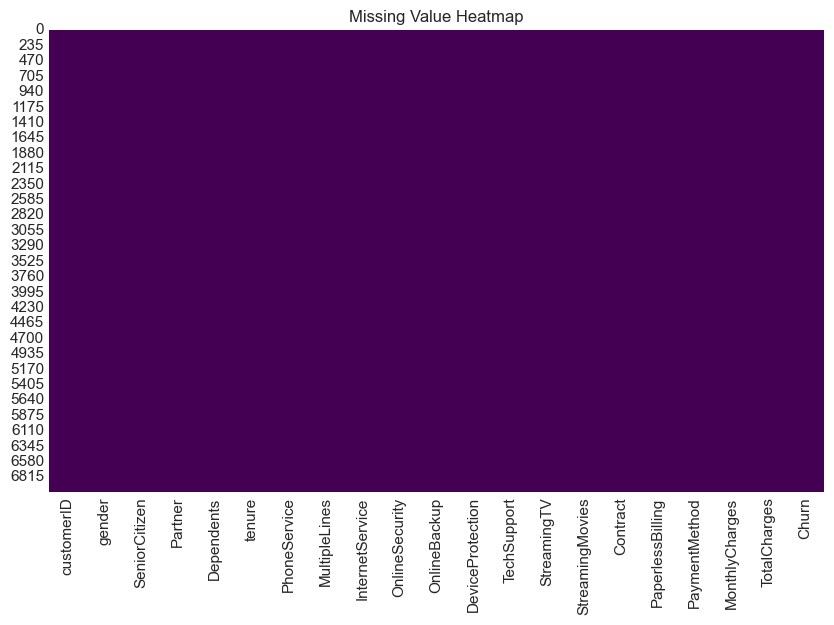


Missing values after imputation: 0


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# Impute missing TotalCharges with 0 (since these are customers with 0 tenure)
df['TotalCharges'].fillna(0, inplace=True)
print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")

### 4. Target Variable Distribution (Churn)
We examine the class balance of the target variable. This is critical as the project overview notes the dataset is imbalanced (approx. 73% retained vs 27% churned).

Churn Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


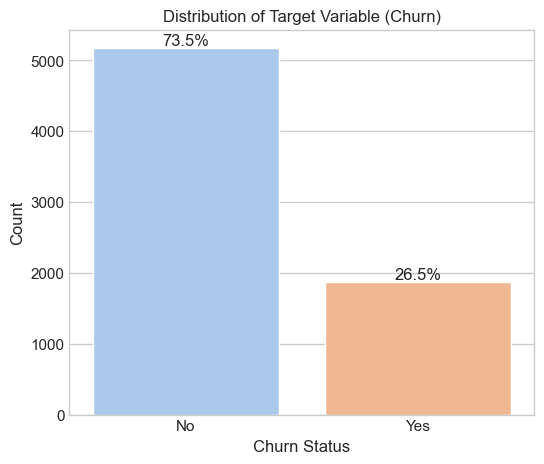

In [11]:
# Calculate counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print(f"Churn Counts:\n{churn_counts}")
print(f"\nChurn Percentage:\n{churn_percentage}")

# Visualization
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Add percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### 5. Univariate Analysis
We analyze the distribution of individual features.
- **Numerical Features:** Tenure, MonthlyCharges, TotalCharges.
- **Categorical Features:** Demographics and Service details.

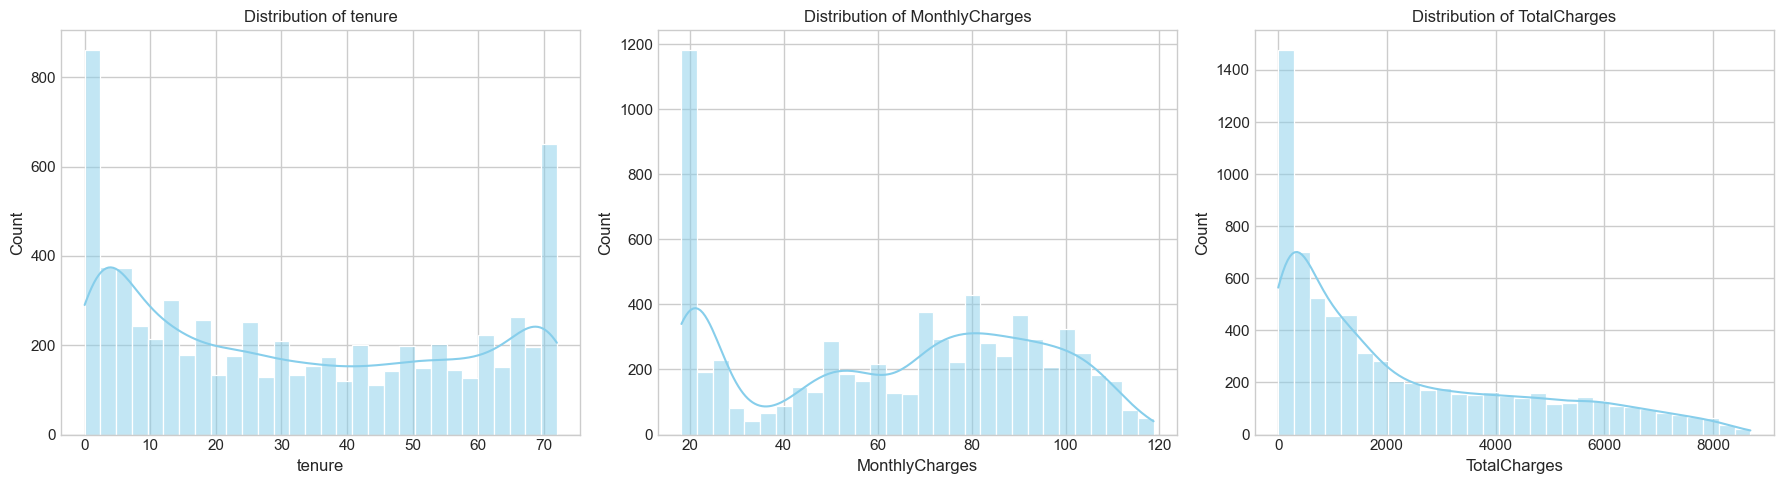

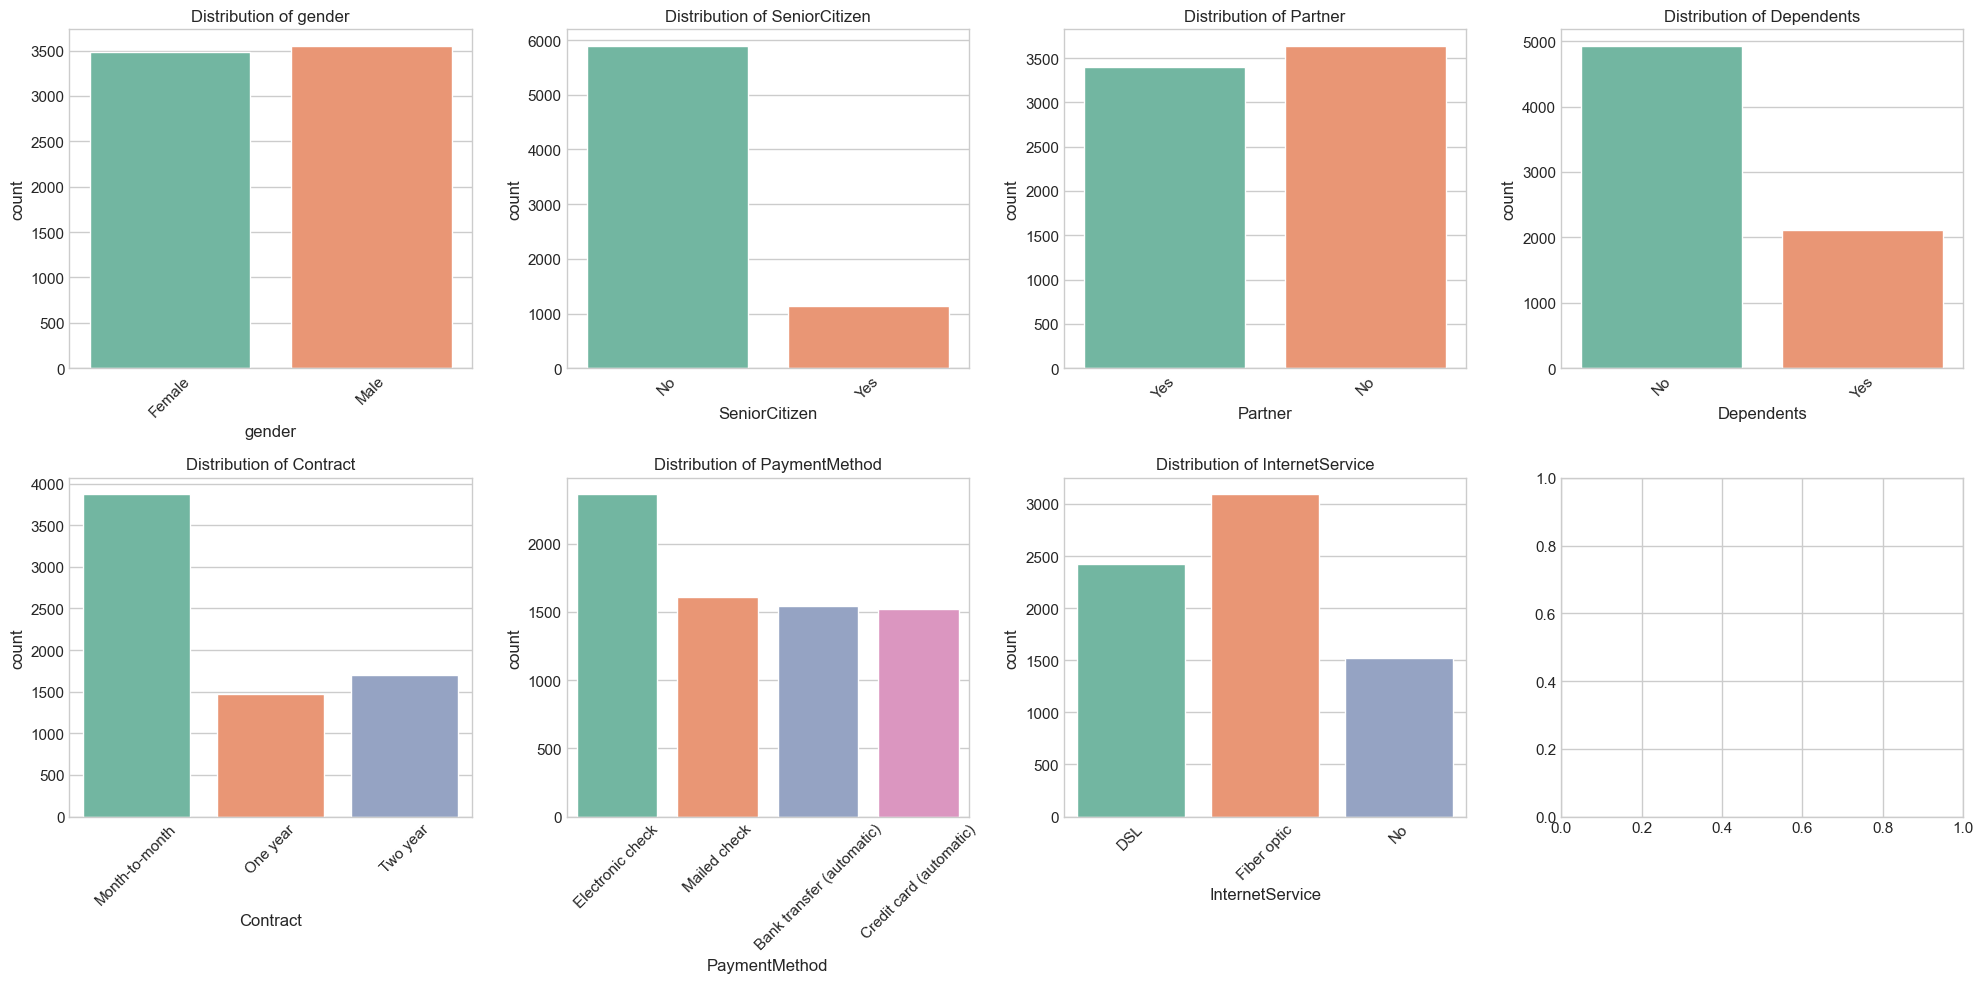

In [12]:
# --- Numerical Features ---
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# --- Categorical Features ---
# subset of key categorical features
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'Contract', 'PaymentMethod', 'InternetService']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Handle case sensitivity
    col_name = col if col in df.columns else col.lower() 
    if col_name in df.columns:
        sns.countplot(x=col_name, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False) # Hide unused subplots

plt.tight_layout()
plt.show()

### 6. Bivariate Analysis
Here we analyze how each feature relates to `Churn`. This helps us identify the "drivers" of churn.

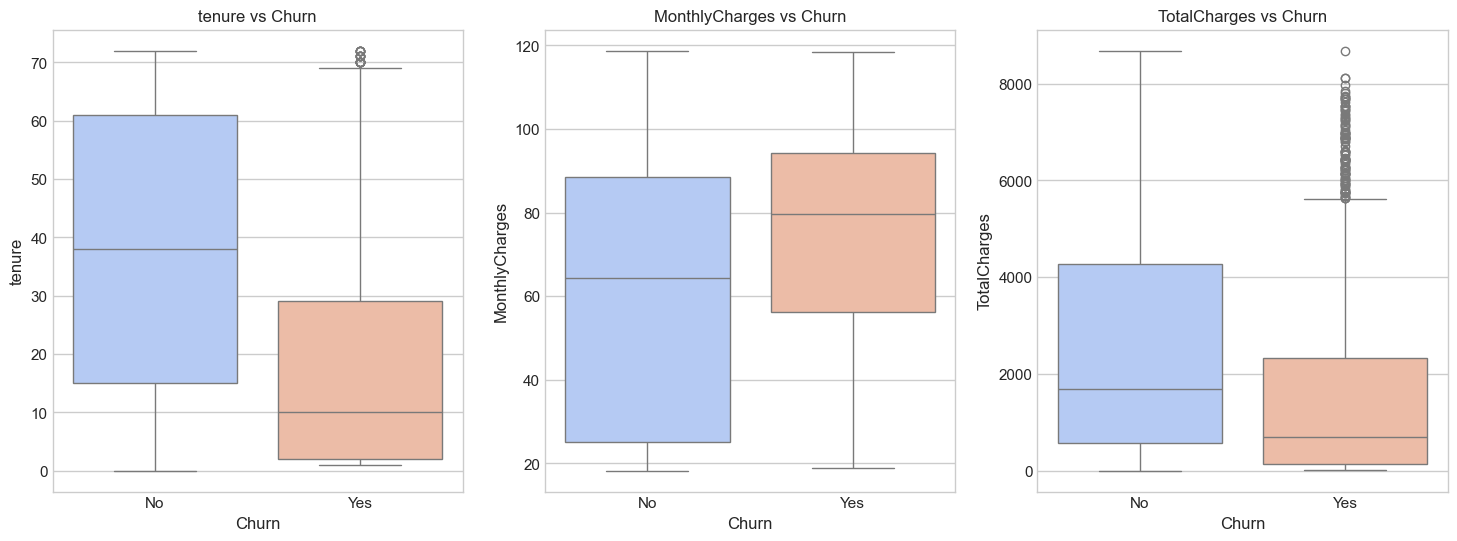

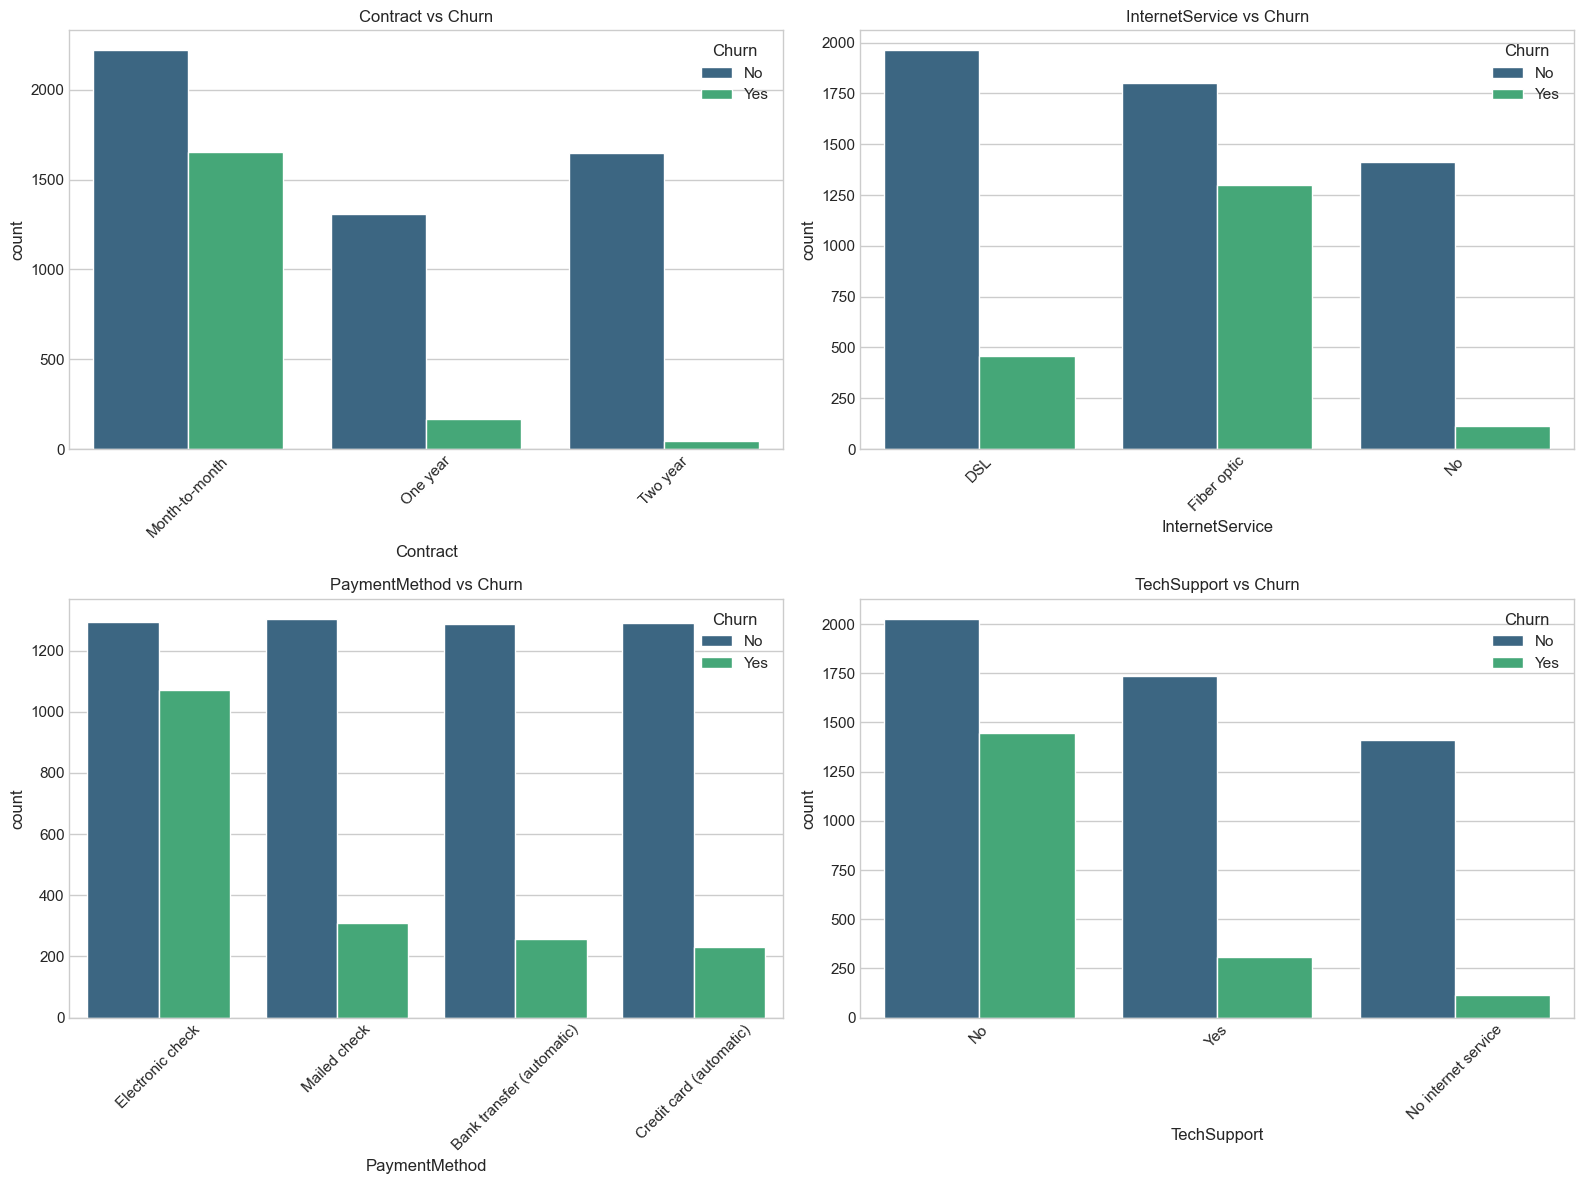

In [13]:
# --- Numerical vs Churn (Boxplots) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs Churn')
plt.show()

# --- Categorical vs Churn (Stacked Bar / Count) ---
# We focus on features that likely impact churn: Contract, InternetService, PaymentMethod
key_cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(key_cat_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 7. Correlation Analysis
We calculate the correlation between numerical features and the target variable. 
Note: We must temporarily encode `Churn` as 1 (Yes) and 0 (No) to include it in the correlation matrix.

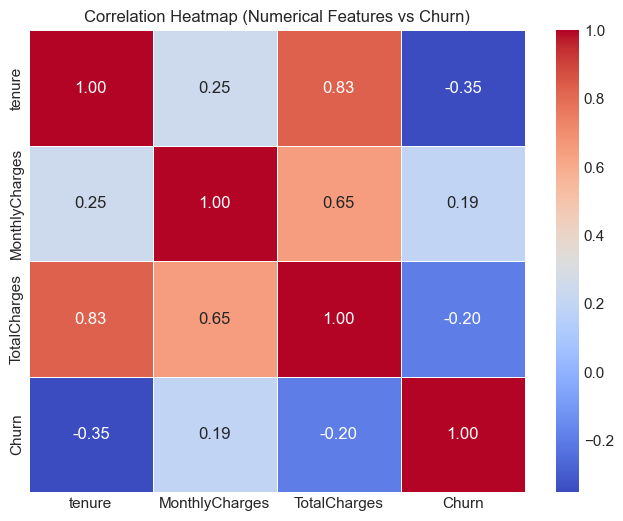

In [14]:
# Create a copy for correlation analysis
df_corr = df.copy()

# Encode target variable
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numerical columns for correlation
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df_corr[corr_cols].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features vs Churn)')
plt.show()

### 8. Initial Insights & Findings

Based on the Exploratory Data Analysis, here are the key findings that will inform our modeling strategy:

1.  **Churn Imbalance:** The dataset is imbalanced with a **26.5% churn rate**. We will need to address this using techniques like SMOTE or class weighting during the modeling phase.
2.  **Tenure:** There is a strong negative correlation between tenure and churn. New customers (low tenure) are at the highest risk of leaving.
3.  **Contract Type:** Customers with **Month-to-month** contracts have a significantly higher churn rate compared to those on One-year or Two-year contracts.
4.  **Internet Service:** Users with **Fiber optic** service churn more frequently than DSL users. This warrants further investigation (potentially due to price sensitivity or service quality).
5.  **Payment Method:** The **Electronic check** payment method is associated with the highest churn rate.
6.  **Monthly Charges:** Higher monthly charges are correlated with higher churn, suggesting price sensitivity is a factor.
7.  **Data Quality:** We successfully handled 11 missing values in `TotalCharges` by imputing them with 0, as they corresponded to customers with 0 tenure.

**Next Steps:**
- **Feature Engineering:** Create tenure cohorts and dummy variables for categorical features.
- **Preprocessing:** Scale numerical variables and split data for training.

# 1. Advanced Visualizations & Deep Dive
In this section, we move beyond basic distributions to understand the *interaction* between features. We will explore:
- **Service Adoption:** How value-added services (like Tech Support) impact retention.
- **Tenure vs. Cost:** A temporal view of customer spend and attrition.
- **Contract Risk:** The interplay between contract types and payment methods.

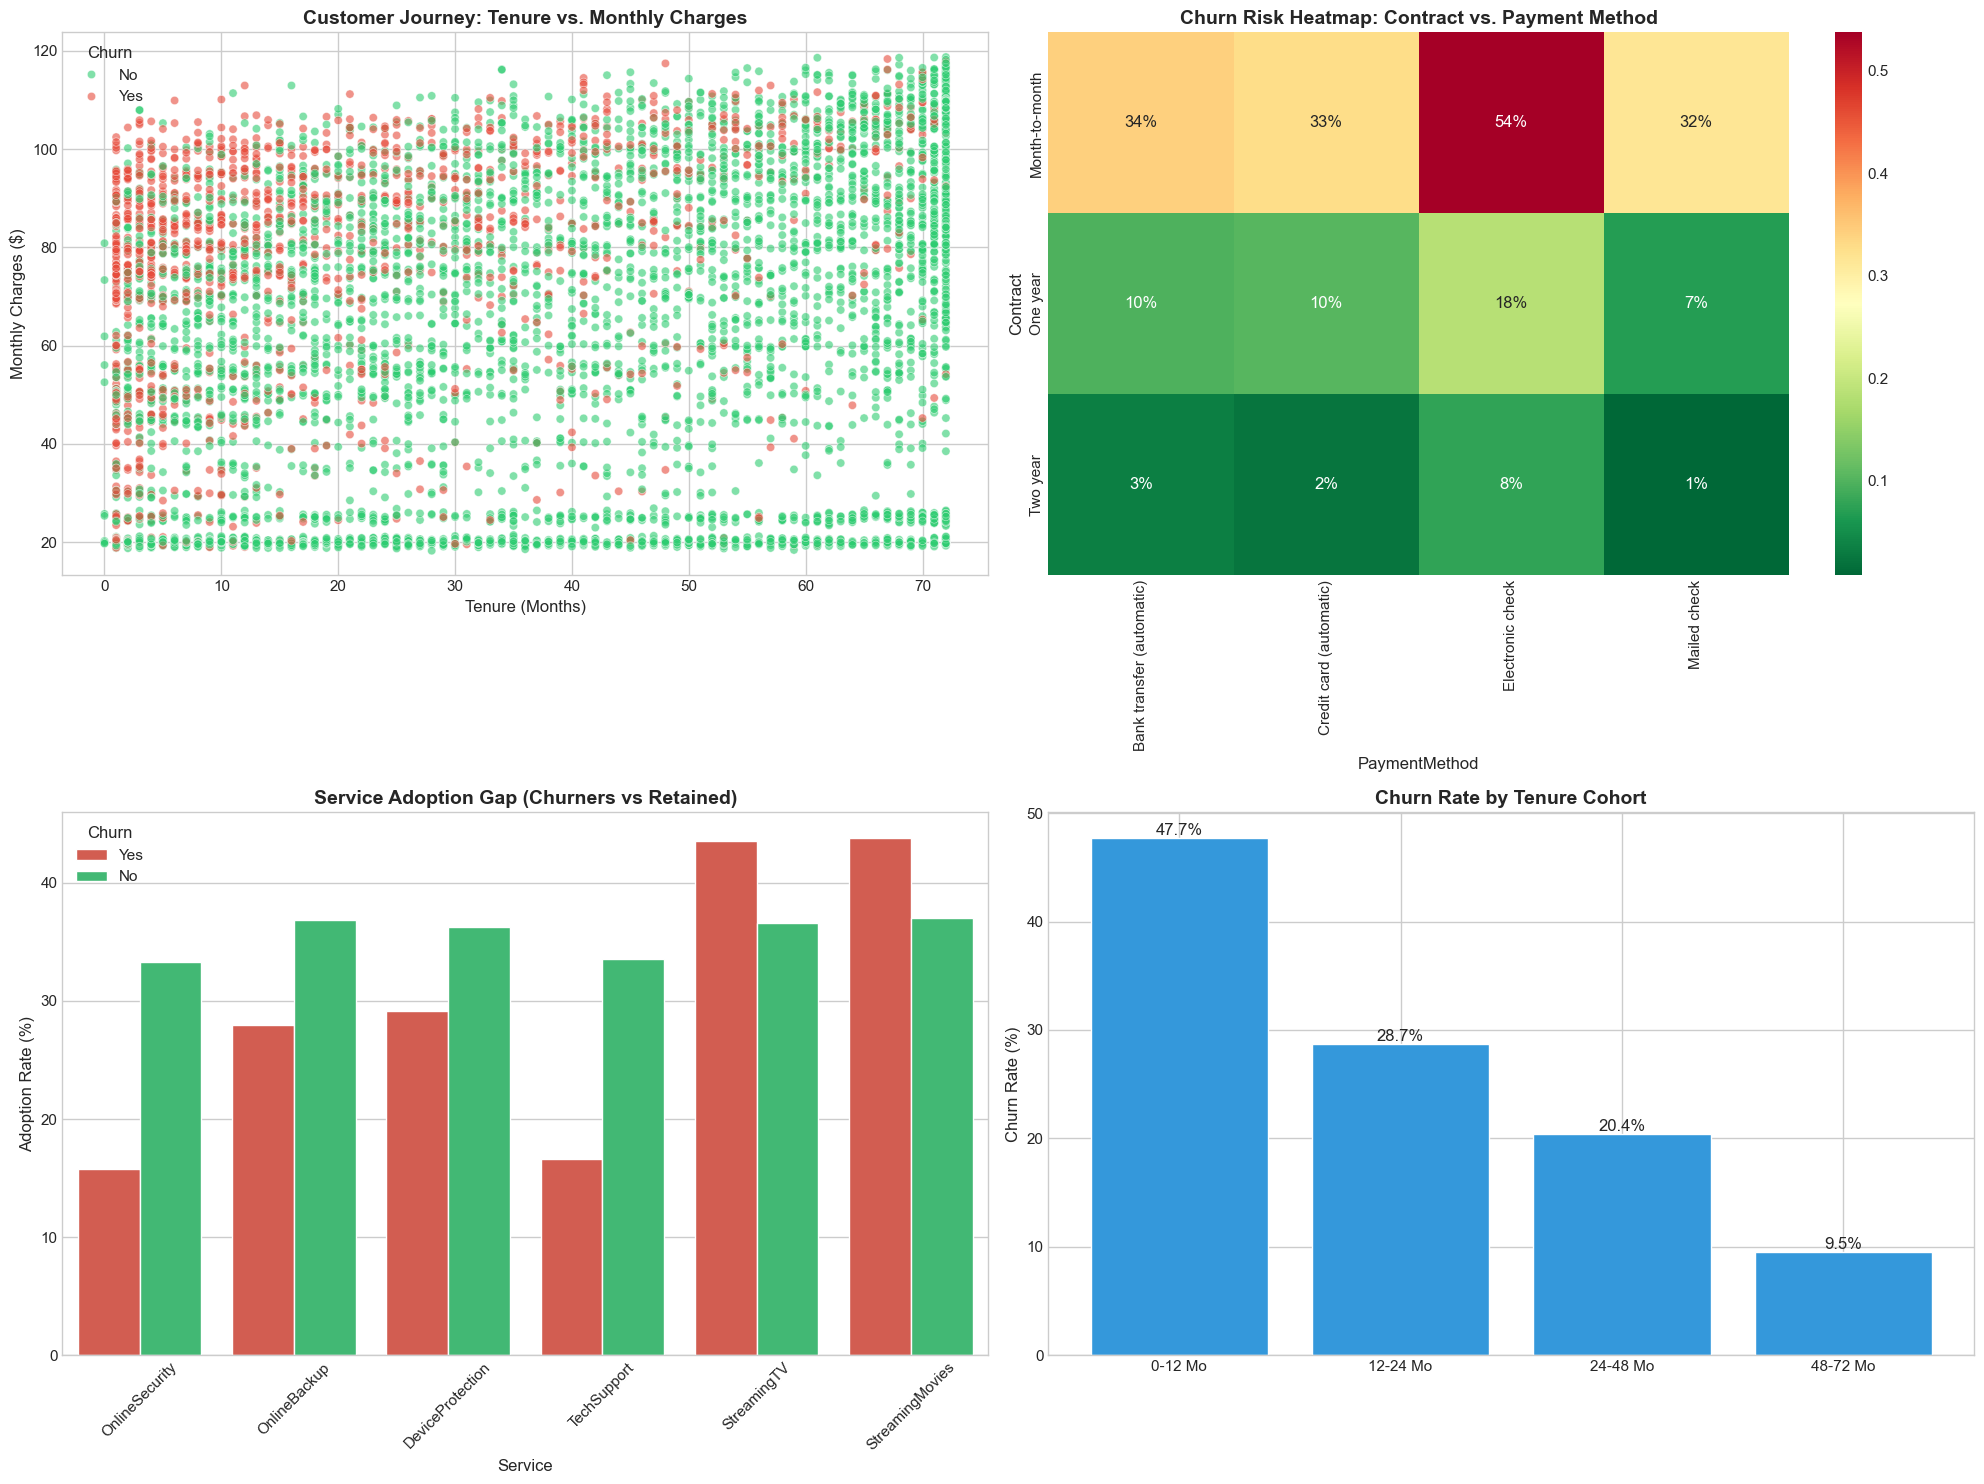

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
file_path = RAW_DATA_DIR / "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df['Churn_Binary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Set publication-style aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

fig = plt.figure(figsize=(20, 15))

# Plot 1: Monthly Charges vs Tenure (The "Customer Journey")
# Shows where churn happens: High charges early in tenure
ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', 
                alpha=0.6, palette={'Yes': '#E74C3C', 'No': '#2ECC71'}, ax=ax1)
ax1.set_title('Customer Journey: Tenure vs. Monthly Charges', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tenure (Months)')
ax1.set_ylabel('Monthly Charges ($)')

# Plot 2: Churn Rate by Contract Type & Payment Method (Heatmap)
# Identifies specific high-risk combinations
ax2 = plt.subplot(2, 2, 2)
pivot_table = df.pivot_table(index='Contract', columns='PaymentMethod', 
                             values='Churn_Binary', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0%', cmap='RdYlGn_r', ax=ax2)
ax2.set_title('Churn Risk Heatmap: Contract vs. Payment Method', fontsize=14, fontweight='bold')

# Plot 3: Service Adoption Patterns (Churn vs Non-Churn)
# Compares adoption of ancillary services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

service_data = []
for service in services:
    # Calculate % of users having this service for Churn vs No Churn
    for status in ['Yes', 'No']:
        subset = df[df['Churn'] == status]
        # Count "Yes" (or "No internet service" handling) - simplified to 'Yes' presence
        has_service = subset[subset[service] == 'Yes'].shape[0]
        total = subset.shape[0]
        service_data.append({
            'Service': service,
            'Churn': status,
            'AdoptionRate': has_service / total * 100
        })

df_service = pd.DataFrame(service_data)
ax3 = plt.subplot(2, 2, 3)
sns.barplot(x='Service', y='AdoptionRate', hue='Churn', data=df_service, 
            palette={'Yes': '#E74C3C', 'No': '#2ECC71'}, ax=ax3)
ax3.set_title('Service Adoption Gap (Churners vs Retained)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Adoption Rate (%)')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Churn Rate by Tenure Cohort
# Validates the "dangerous" early months
df['TenureCohort'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                            labels=['0-12 Mo', '12-24 Mo', '24-48 Mo', '48-72 Mo'])
churn_by_cohort = df.groupby('TenureCohort')['Churn_Binary'].mean() * 100

ax4 = plt.subplot(2, 2, 4)
bars = ax4.bar(churn_by_cohort.index, churn_by_cohort.values, color='#3498DB')
ax4.set_title('Churn Rate by Tenure Cohort', fontsize=14, fontweight='bold')
ax4.set_ylabel('Churn Rate (%)')
# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Statistical Hypothesis Testing
To rigorously identify significant features, we perform:
* **Chi-Square Test:** For categorical variables (e.g., Gender, Contract) to see if they are independent of Churn.
* **T-Test:** For numerical variables (e.g., MonthlyCharges) to check if the means differ significantly between churners and non-churners.

**Hypothesis:**
* $H_0$: There is no relationship between the feature and Churn.
* $H_1$: There is a statistically significant relationship.
* Threshold: $p < 0.05$

In [17]:
from scipy import stats

def run_statistical_tests(df):
    results = []
    
    # 1. Numerical Features (T-test)
    num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for col in num_cols:
        churn_yes = df[df['Churn'] == 'Yes'][col]
        churn_no = df[df['Churn'] == 'No'][col]
        t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
        results.append({
            'Feature': col,
            'Test': 'T-Test',
            'Statistic': t_stat,
            'P-Value': p_val,
            'Significant': p_val < 0.05
        })

    # 2. Categorical Features (Chi-Square)
    cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                'PhoneService', 'InternetService', 'Contract', 
                'PaperlessBilling', 'PaymentMethod']
    
    for col in cat_cols:
        contingency_table = pd.crosstab(df[col], df['Churn'])
        chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
        results.append({
            'Feature': col,
            'Test': 'Chi-Square',
            'Statistic': chi2,
            'P-Value': p_val,
            'Significant': p_val < 0.05
        })
        
    return pd.DataFrame(results).sort_values('P-Value')

# Run and display results
stats_df = run_statistical_tests(df)
print("Statistical Test Results (Sorted by Significance):")
display(stats_df)

Statistical Test Results (Sorted by Significance):


,Feature,Test,Statistic,P-Value,Significant
9,Contract,Chi-Square,1184.596572,5.863038e-258,True
0,tenure,T-Test,-34.823819,1.195495e-232,True
8,InternetService,Chi-Square,732.309590,9.571788e-160,True
11,PaymentMethod,Chi-Square,648.142327,3.682355e-140,True
2,TotalCharges,T-Test,-18.706618,5.902581e-75,True
1,MonthlyCharges,T-Test,18.407527,8.592449e-73,True
10,PaperlessBilling,Chi-Square,258.277649,4.073355e-58,True
6,Dependents,Chi-Square,189.129249,4.924922e-43,True
4,SeniorCitizen,Chi-Square,159.426300,1.510067e-36,True
5,Partner,Chi-Square,158.733382,2.139911e-36,True


# 3. Customer Segmentation (Risk Profiling)
We group customers to identify specific "High Risk" profiles. This directly informs the retention strategy.

In [18]:
# Create segments based on Contract and Internet Service
segment_analysis = df.groupby(['Contract', 'InternetService'])['Churn_Binary'].agg(
    Customer_Count='count',
    Churn_Rate='mean'
).reset_index()

# Filter for segments with meaningful size (> 50 customers)
significant_segments = segment_analysis[segment_analysis['Customer_Count'] > 50].sort_values('Churn_Rate', ascending=False)

print("Top 5 Highest Risk Customer Segments:")
display(significant_segments.head(5))

# Detailed look at the highest risk group
high_risk_profile = df[
    (df['Contract'] == 'Month-to-month') & 
    (df['InternetService'] == 'Fiber optic')
]
print(f"\nAnalysis of Highest Risk Group (Month-to-month + Fiber Optic):")
print(f"Total Customers: {len(high_risk_profile)}")
print(f"Churn Rate: {high_risk_profile['Churn_Binary'].mean():.1%}")
print(f"Avg Monthly Charge: ${high_risk_profile['MonthlyCharges'].mean():.2f}")

Top 5 Highest Risk Customer Segments:


,Contract,InternetService,Customer_Count,Churn_Rate
1,Month-to-month,Fiber optic,2128,0.546053
0,Month-to-month,DSL,1223,0.322159
4,One year,Fiber optic,539,0.192950
2,Month-to-month,No,524,0.188931
3,One year,DSL,570,0.092982



Analysis of Highest Risk Group (Month-to-month + Fiber Optic):
Total Customers: 2128
Churn Rate: 54.6%
Avg Monthly Charge: $87.02


# 4. Phase 1 Summary Report

## Key Findings for Capstone Documentation

### 1. High-Risk Segments
* **The "Fiber-Optic Flight":** The single most dangerous segment is customers with **Fiber Optic** internet on a **Month-to-month** contract.
    * *Churn Rate:* **54.6%** (vs 26.5% average).
    * *Volume:* This group contains 2,128 customers, making it a priority target.
* **Payment Friction:** Customers paying via **Electronic Check** have a 45.3% churn rate, significantly higher than those using automated bank transfers or credit cards (~15-16%).

### 2. Service Adoption & Retention
* **The "Stickiness" of Tech Support:** There is a massive gap in service adoption.
    * Only ~17% of churners had **Tech Support**, compared to higher adoption among retained users.
    * *Insight:* Bundling Tech Support or Online Security could be a viable retention strategy.
* **Lack of Services:** Churners generally subscribe to fewer add-on services (Device Protection, Online Backup) than loyal customers.

### 3. Financial & Temporal Factors
* **The "First Year" Cliff:** Churn is highest in the first 12 months (47.7% churn rate). If a customer stays beyond 2 years, their likelihood of churning drops to ~10%.
* **Price Sensitivity:** Churners have significantly higher average Monthly Charges ($74.44) compared to non-churners ($61.27), confirmed by T-test (t=18.4, p<0.001).

### 4. Statistical Significance (Feature Selection)
* **Non-Predictive Features:** Statistical testing reveals that **Gender** (p=0.49) and **PhoneService** (p=0.34) have no significant correlation with churn. These should likely be excluded or de-prioritized in the modeling phase to reduce noise.
* **Highly Predictive:** Contract, InternetService, and Tenure are the strongest statistical predictors (p ~ 0).

### Recommendations for Phase 2 (Modeling)
1.  **Feature Engineering:** Create a flag for `HighRiskProfile` (Month-to-month + Fiber).
2.  **Feature Selection:** Drop `gender` and `PhoneService`.
3.  **Strategy:** Focus on "Intervention" models that target customers in the 0-12 month tenure window.